# 6. Plot Hubble diagram

Loads `runs/<run>/distance_process.csv` and plots **μ_obs vs log(z)** (redshift on a log scale); optionally overlays the theoretical μ_th(z) curve for the same FlatLambdaCDM cosmology. Reports combined H₀ (or residual statistics) and saves figures in `runs/<run>/<timestamp>_png/` (e.g. `hubble_diagram_<timestamp>.png`, `hubble_residuals_<timestamp>.png`).

**Note on redshift clusters:** If you see vertical stripes (many points at the same redshift), this is usually **catalog precision**, not selection bias or SN physics. The BTS/TNS catalogs often report redshifts to 2 decimal places (e.g. 0.06, 0.07). Notebooks 4 and 5 prefer **tns_redshift** when available to reduce this effect.

In [4]:
from pathlib import Path
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
print(f"Project root: {project_root}")

Project root: /Users/david/Code/msc


In [5]:
run_name = input("Enter the run name: ").strip()
run_folder = project_root / "runs" / run_name
distance_process_path = run_folder / "distance_process.csv"

if not distance_process_path.exists():
    raise FileNotFoundError(f"No distance_process.csv found at {distance_process_path}")

df = pd.read_csv(distance_process_path)
print(df.head())

# Filter to z > 0 and sort by redshift for plotting (use redshift = best available from fit)
dfp = df[df["redshift"] > 0].sort_values("redshift").copy()
# Drop invalid rows for distance moduli or residuals
valid = np.isfinite(dfp["mu_obs"]) & np.isfinite(dfp["redshift"])
dfp = dfp.loc[valid]
if len(dfp) < len(df):
    print(f"Dropped {len(df) - len(dfp)} rows")
print(f"Loaded {len(dfp)} objects from {distance_process_path}")
dfp.head()

         ztf_id  redshift  tns_redshift  ncall  ndof      chisq            t0  \
0  ZTF17aadlxmv   0.06200           NaN    115    23  17.787064  58878.407382   
1  ZTF18aaaqexr   0.07020           NaN    101     7   3.710129  58893.649163   
2  ZTF18aaeqjmc   0.04300           NaN    151     8   9.818289  60266.905510   
3  ZTF18aafdigb   0.06300           NaN    103    10   8.609961  60231.409033   
4  ZTF18aagkwgz   0.03775           NaN    113    20  16.023540  60583.391600   

         x0        x1         c         mB     mu_obs      mu_th     resid  
0  0.001049  0.733390  0.127677  18.083317  37.150194  37.220306 -0.070112  
1  0.000589 -1.246107  0.076504  18.709666  37.658048  37.502565  0.155483  
2  0.002637 -0.664076  0.070290  17.082096  36.131226  36.396078 -0.264852  
3  0.000684 -2.905661  0.054759  18.547734  37.331190  37.256587  0.074603  
4  0.002406  0.430951  0.146229  17.181873  36.148897  36.104994  0.043903  
Loaded 1309 objects from /Users/david/Code/msc/runs

,ztf_id,redshift,tns_redshift,ncall,ndof,chisq,t0,x0,x1,c,mB,mu_obs,mu_th,resid
548,ZTF21aarqkes,0.00934,NaN,104,46,112.801887,59322.879121,0.038222,-0.053127,0.072946,14.179212,33.305642,33.025958,0.279684
706,ZTF21achxlkq,0.01400,NaN,112,18,18.503257,59517.919746,0.009467,-0.199447,0.024224,15.694414,34.951398,33.912572,1.038826
63,ZTF18abmxahs,0.01480,NaN,104,19,20.366024,58362.747072,0.017412,-0.084934,-0.009084,15.032896,34.409164,34.034558,0.374606
1006,ZTF23abhvuft,0.01489,NaN,113,32,29.533916,60233.472553,0.009205,-0.746142,0.256395,15.724953,34.185668,34.047871,0.137796
1301,ZTF25acjpvvr,0.01500,NaN,115,10,8.428725,61035.367349,0.025539,0.917122,-0.046857,14.617003,34.250656,34.064035,0.186621


Saved to /Users/david/Code/msc/runs/run7/20260207_133353_png/hubble_diagram_20260207_133353.png


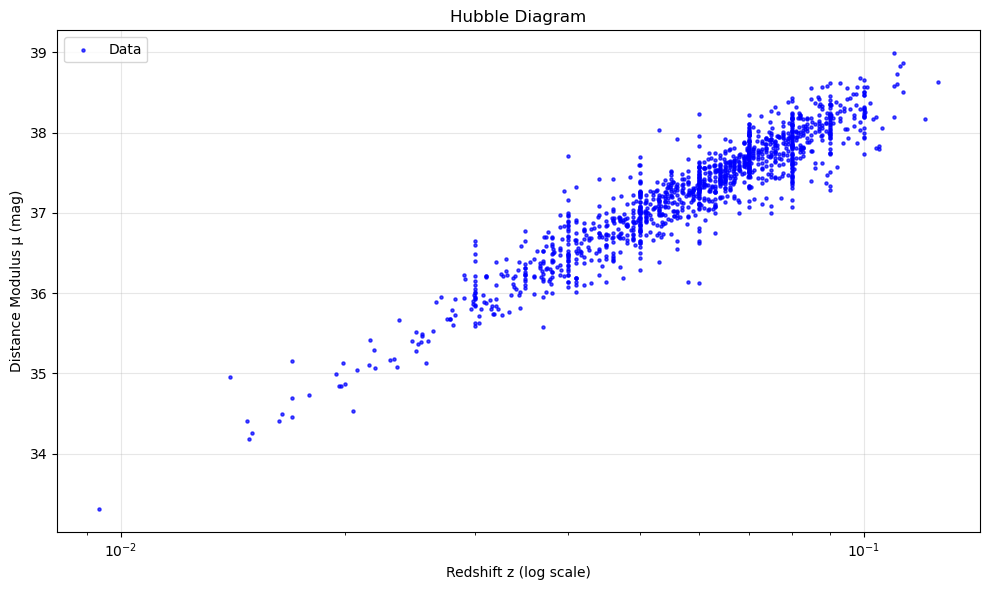

Saved to /Users/david/Code/msc/runs/run7/20260207_133353_png/hubble_residuals_20260207_133353.png


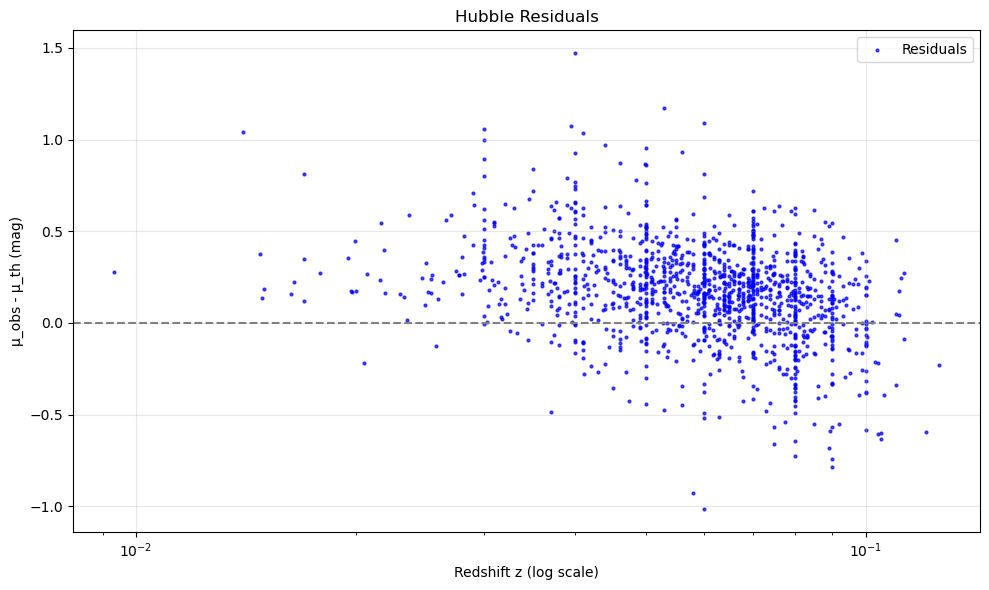

In [6]:
z_data = dfp["redshift"].to_numpy()
mu_obs = dfp["mu_obs"].to_numpy()

# Hubble diagram
plt.figure(figsize=(10, 6))
plt.scatter(z_data, mu_obs, label="Data", color="blue", s=5, zorder=5, alpha=0.7)
plt.xscale("log")
plt.xlabel("Redshift z (log scale)")
plt.ylabel("Distance Modulus μ (mag)")
plt.title("Hubble Diagram")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# timestamped folder for this run's PNGs
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
png_dir = run_folder / f"{timestamp}_png"
png_dir.mkdir(parents=True, exist_ok=True)
out_path = png_dir / f"hubble_diagram_{timestamp}.png"
plt.savefig(out_path, dpi=150)
print(f"Saved to {out_path}")
plt.show()

resid_best = dfp["resid"].to_numpy()

plt.figure(figsize=(10, 6))
plt.axhline(0, color="gray", ls="--")
plt.scatter(z_data, resid_best, label="Residuals", color="blue", s=4, alpha=0.7)
plt.xscale("log")
plt.xlabel("Redshift z (log scale)")
plt.ylabel("μ_obs - μ_th (mag)")
plt.title("Hubble Residuals")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

resid_path = png_dir / f"hubble_residuals_{timestamp}.png"
plt.savefig(resid_path, dpi=150)
print(f"Saved to {resid_path}")
plt.show()

In [7]:
# H0 from fiducial cosmology (H0=70) and residuals: resid = μ_obs - μ_th(70)
# Distance modulus scales as μ = -5 log10(H0), so H0 = 70 * 10^(-mean(resid)/5)
H0_fid = 70.0
resid = dfp["resid"].to_numpy()
mean_resid = np.mean(resid)
H0_est = H0_fid * (10 ** (-mean_resid / 5))
print(f"H0 = {H0_est:.2f} km/s/Mpc (from mean residual, fiducial H0={H0_fid:.0f})")

# Residual statistics
std_resid = np.std(resid)
median_resid = np.median(resid)
n_objects = len(resid)
print(f"Residuals: mean = {mean_resid:.4f} mag, std = {std_resid:.4f} mag, median = {median_resid:.4f} mag")

# Append this run to global H0 history CSV (project root)
description = input("Description for this entry (optional): ").strip()
run_ts = datetime.now().strftime("%Y%m%d_%H%M%S")
history_path = project_root / "h0_history.csv"
new_row = pd.DataFrame([{
    "timestamp": run_ts,
    "run_name": run_name,
    "description": description if description else "",
    "H0_est": H0_est,
    "mean_resid": mean_resid,
    "std_resid": std_resid,
    "median_resid": median_resid,
    "n_objects": n_objects,
    "H0_fid": H0_fid,
}])
if history_path.exists():
    hist = pd.read_csv(history_path)
    hist = pd.concat([hist, new_row], ignore_index=True)
else:
    hist = new_row
hist.to_csv(history_path, index=False)
print(f"Appended to {history_path}")

H0 = 64.80 km/s/Mpc (from mean residual, fiducial H0=70)
Residuals: mean = 0.1676 mag, std = 0.2671 mag, median = 0.1774 mag
Appended to /Users/david/Code/msc/h0_history.csv
